

Write a function that creates a population of size 100, half of which have allele ‘A’ and half which have allele ‘B’. This can be created as a list with 50 ‘A’ and 50 ‘B’. This list will represent the initial population.
The script should then complete 1000 generations using the following rules:

    • With each generation an allele from the current population list should be randomly selected and added to a new list representing the new population.
 
    • The random selection should occur the same number of times as the population size (100) so that the new and original populations are the same size.
    
    • Note that this means that some alleles may reproduce more than once and others may not reproduce at all.

    • If either of the alleles is completely lost from the population then no further generations should be completed.

The script also needs to produce a plot that shows the change in allele frequency with each generation, up to the 1000 generations or when either one was lost. The plot should be produced once, when all of the generations have been completed and display both alleles. 



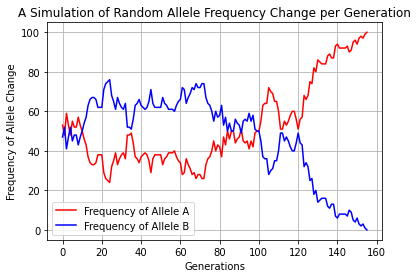

In [2]:
#Import modules for use

from pylab import * #module imported for plotting data
import numpy as np #module imported for mathematical and randomisation operations

#Define function allele_drift using arguments 'popsize' and 'generations'
def allele_drift(popsize, generations):
    
    #Create variables for use
    plot_freq_a = []
    plot_freq_b = []
    freq_a = 50
    freq_b = 50
    pop_list = []
    
    #foor loops to generate static pop_list of 50(A) alleles and 50(B) alleles
    for allele in range(0, int(popsize/2)):
        pop_list.append("A")
    for allele in range(int(popsize/2), popsize):
        pop_list.append("B")

    #for loop based on n<=1000 generations
    for i in range(generations):
        if(freq_a >0) and (freq_b >0): #conditions that need to be met for next iteration of for loop
            
            #new_pop_list = randomly chosen allele (A or B) from pop_list, sample size = popsize, with replacement to pop_list
            new_pop_list = np.random.choice(pop_list, popsize, replace=True)
            #counting frequency of A and B alleles (not equal to zero) each iteration of the loop, assign to respective variable
            allele_a = np.count_nonzero(new_pop_list =="A")
            allele_b = np.count_nonzero(new_pop_list =="B")
            freq_a = allele_a #reassigning allele_a list to freq_a - overwrites value in freq_a in if statement for next iteration 
            freq_b = allele_b #reassigning allele_b list to freq_b - overwrites value in freq_b in if statement for next iteration 
            pop_list = new_pop_list #updates pop_list with new population data for next iteration
            plot_freq_a.append(freq_a)
            plot_freq_b.append(freq_b) #append to variables outside of the for loop, use for plotting
    
    #Plot the data, (generation = 0) == first generation
    y_data = plot_freq_a 
    y_data2 = plot_freq_b 
    plot(y_data, 'r', label="Frequency of Allele A")
    plot(y_data2, 'b', label="Frequency of Allele B")
    xlabel("Generations")
    ylabel("Frequency of Allele Change") 
    title("A Simulation of Random Allele Frequency Change per Generation") 
    legend(loc='lower left')
    grid(True)
    show()

allele_drift(100, 1000) #calling function 'allele_drift'(popsize = 100, generations = 1000)


---


Write a second function that has 2 alleles for a gene ‘A’ present in each individual. The alleles are ‘A’ and ‘a’ and the individuals are either ‘AA’, ‘Aa’ or ‘aa’.

The population size will again be 100.

The initial population has an even distribution of alleles so 25% are “AA”, 50% “Aa” (25% ‘Aa’ and 25% ‘aA’) and 25% “aa”.

An evolutionary event has occurred that means only 80% of ‘aa’ individuals will survive to maturity to breed, which needs to be accommodated in the script. However, the population size will remain static at 100 after each generation.

With each generation one allele from each random individual should be combined with one allele from another random individual to create a new population of 100. As ‘aa’ is only 80% successful it means that in the new population you should only include 80% of those created, so 1 in 5 of the aa you create should be rejected and a new individual created in its place. However, make sure that the final population size after each generation is still 100. 

An individual cannot breed with itself.

Run the simulation for a maximum of 500 generations or until allele “a” disappears from the population, at which point it should stop. 

Finally, draw a plot of ‘AA’, ‘Aa’, and ‘aa’.


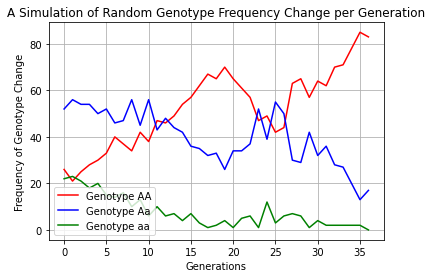

In [1]:
#Import numeric and plotting modules for use

from pylab import * #module imported for plotting data
import numpy as np #module imported for numerical operations and randomisation
import copy #module to copy static population list

#Define function genotype_drift with argument 'generations' for n<=500
def genotype_drift(generations):
    
    #creating a static list (n=100) of genotypes, each genotype is n=25
    initial_pop_static = []
    for i in range(25):
        initial_pop_static.append("AA")
    for i in range(25):
        initial_pop_static.append("Aa")
    for i in range(25):
        initial_pop_static.append("aA")
    for i in range(25):
        initial_pop_static.append("aa")
    np.random.shuffle(initial_pop_static) #randomly shuffling the arrangement of genotypes in initial_pop
    population = copy.copy(initial_pop_static) #copying list 'initial_pop_static' to var 'population' as to not overwrite it each loop

    #Defining variables for use
    plot_freq_aa = []
    plot_freq_AA = []
    plot_freq_Aa = []
    new_population = []
    individual_1 = []
    individual_2 = []
    
    #initial frequency of freq_aa to feed into if statement below. 
    #This value will then be replaced by value reassignment in for loop.
    freq_aa = 25 
    
    #for up to 500 generations, and if the frequency of aa>0, create a population list 
    #of 100 based on several conditions
    for generation in range(generations):
        if freq_aa > 0:
            new_population = [] #empty new_population list so to not continuously append to it over generations
            for i in range(0, len(population)):
                random_index1 = np.random.randint(0, (len(population))) #generates random numbers for indexing [population]
                random_index2 = np.random.randint(0, (len(population)))
                individual_1 = population[random_index1] #selects genotypes in [population] based on randomised index numbers
                individual_2 = population[random_index2]
                progeny = individual_1[np.random.randint(0,2)] + individual_2[np.random.randint(0,2)] #progeny = 1 x random allele from both random parents
                
                #While loop to ensure the same two random individuals will not be selected for breeding
                while random_index1 == random_index2:
                    random_index1 = np.random.randint(0, (len(population)))
                    random_index2 = np.random.randint(0, (len(population)))
                    individual_1 = population[random_index1]
                    individual_2 = population[random_index2]
                    progeny = individual_1[np.random.randint(0,2)] + individual_2[np.random.randint(0,2)]
                
                #generate a random number between 1 and 5 (p=0.2 for any number)
                # if the progeny genotype == "aa", chance of p=0.2 replacement 
                random_no = np.random.randint(1,6)
                if progeny == "aa" and random_no == 3: #3 chosen from random numbers 1 to 5
                    progeny = np.random.choice(population, replace=True) #replace every fifth "aa" with genotype from list population
                    new_population.append(progeny)
                else:
                    new_population.append(progeny)
            
            #Outside of the for loop, count frequencies of each genotype. Reassign count variables to
            # global variables outside of the loop
            AA = new_population.count("AA")
            Aa = new_population.count("Aa")
            aA = new_population.count("aA")
            aa = new_population.count("aa")
            plot_freq_AA.append(AA)
            plot_freq_Aa.append(Aa + aA)
            plot_freq_aa.append(aa)
            
            #assigning variable 'aa' (count of aa each generation) to freq_aa for next generation iteration
            freq_aa = aa
            #assigning variable 'new_population' (100 randomly bred genotypes) to list population for next iteration
            population = new_population

    #Plot the data points, (generation = 0) == first generation 
    y_data = plot_freq_AA #frequency of AA
    y_data2 = plot_freq_Aa  #frequency of Aa + aA
    y_data3 = plot_freq_aa #frequency of aa
    plot(y_data, 'r', label="Genotype AA")
    plot(y_data2, 'b', label="Genotype Aa")
    plot(y_data3, 'g', label="Genotype aa")
    xlabel("Generations")
    ylabel("Frequency of Genotype Change")
    title("A Simulation of Random Genotype Frequency Change per Generation")
    legend(loc='lower left')
    grid(True)
    show()

genotype_drift(500) #calling function genotype_drift(generations = 500)